In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alien-image-for-prediction/sci-fi-3142474_1920.png
/kaggle/input/alien-vs-predator-images/data/validation/predator/27.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/64.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/6.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/22.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/38.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/51.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/81.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/79.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/16.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/77.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/45.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/85.jpg
/kaggle/input/alien-vs-predator-images/data/validation/predator/30.jpg
/kaggle/input

/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train/predator/293.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train/predator/271.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train/predator/313.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train/predator/71.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train/predator/183.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train/predator/309.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train/predator/287.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train/predator/5.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train/predator/342.jpg
/kaggle/input/alien-vs-predator-images/alien_vs_predator_thumbnails/data/train/predator/284.jpg
/kaggle/input/alien-vs-predator-images/alie

# **using cat vs dog image classifier with traditional and transfer learning feel bored because pre-trained model already trained with feature of dogs and cats**

> #  So,Thought making of aliens vs predator with traditional and transfer learning which hasn't trained
on aliens and predator  **need to thank [piotr migdal](http://https://www.kaggle.com/pmigdal) for amazing image datasets**

In [3]:
import tensorflow
from tensorflow import keras
import cv2

 **Declaring the path for training and testing**

In [4]:
from keras.optimizers import Adam

#training path

train_dataset =  "../input/alien-vs-predator-images/data/train/"
# testing path

test_dataset = "../input/alien-vs-predator-images/data/validation/"

n = cv2.imread("../input/alien-vs-predator-images/data/train/alien/1.jpg")


**Just checking the shape of one image**

In [5]:
n.shape

(174, 290, 3)

**from the shape i declared the image shape i use were 150,150,3 as default for all images**

In [6]:
from keras.optimizers import RMSprop
# model define
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation ="relu", input_shape=(150,150,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation ="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation ="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation ="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation ="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation = "relu"),
    keras.layers.Dense(2, activation = "softmax")
])

from keras.optimizers import Adam

model.compile(
optimizer = Adam(lr = 0.0001),
loss = "categorical_crossentropy",
metrics = ["accuracy"])


# **First, i used traditional cnn with adam optimizer (learning rate = 0.0001) lets check the training and testing data**

In [7]:
# train generator:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True

)

train_generator = train_datagen.flow_from_directory(
    train_dataset,
    batch_size = 10,
    class_mode = "categorical",
    target_size = (150,150)
)

test_datagen = ImageDataGenerator(rescale = 1/255.0,
                                 rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_generator = test_datagen.flow_from_directory(
    test_dataset,
    batch_size = 10,
    class_mode = "categorical",
    target_size = (150,150)
)

Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.



# **Don't worry if you don't know training generator and testing generator (image augumentation)**

[**check this link**](https://keras.io/api/preprocessing/image/)

In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 10,
    epochs = 25,
    validation_data= test_generator,
    verbose = 2,

)

Epoch 1/25
10/10 - 3s - loss: 0.6968 - accuracy: 0.4400 - val_loss: 0.6906 - val_accuracy: 0.5150
Epoch 2/25
10/10 - 3s - loss: 0.6933 - accuracy: 0.4900 - val_loss: 0.6916 - val_accuracy: 0.4950
Epoch 3/25
10/10 - 2s - loss: 0.6945 - accuracy: 0.5000 - val_loss: 0.6895 - val_accuracy: 0.6300
Epoch 4/25
10/10 - 2s - loss: 0.6833 - accuracy: 0.6300 - val_loss: 0.6993 - val_accuracy: 0.5000
Epoch 5/25
10/10 - 2s - loss: 0.7016 - accuracy: 0.4800 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 6/25
10/10 - 2s - loss: 0.6944 - accuracy: 0.4600 - val_loss: 0.6902 - val_accuracy: 0.5050
Epoch 7/25
10/10 - 2s - loss: 0.6960 - accuracy: 0.4100 - val_loss: 0.6879 - val_accuracy: 0.5150
Epoch 8/25
10/10 - 2s - loss: 0.6872 - accuracy: 0.5300 - val_loss: 0.6887 - val_accuracy: 0.5000
Epoch 9/25
10/10 - 2s - loss: 0.6818 - accuracy: 0.5200 - val_loss: 0.6833 - val_accuracy: 0.5150
Epoch 10/25
10/10 - 2s - loss: 0.6870 - accuracy: 0.5800 - val_loss: 0.6793 - val_accuracy: 0.5900
Epoch 11/25
10/10 -

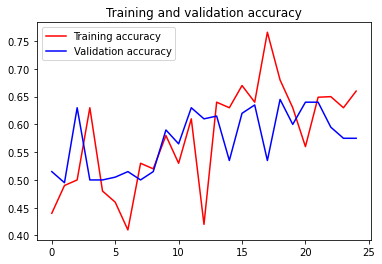

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()


# **look like we got a good (not great) model as a epochs increasing at some sort of point the validaton accuracy goes down**

In [10]:
# prediction
# preprocessing the input 

from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt

def prediction(path,history):

    path = path
    img = image.load_img(path, target_size=(150,150,3))
    x = image.img_to_array(img)
    x = x/255.0

    x = np.expand_dims(x, axis=0)



    images = np.vstack([x])
    classes = history.predict(images, batch_size=20)


    n = cv2.imread(path)
    plt.imshow(n)
    
    return classes

[[0.41126174 0.58873826]]
it is a predator with accuracy :  58 %


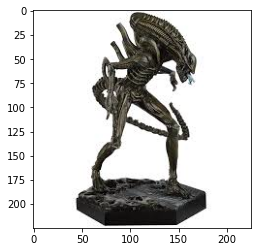

In [11]:

path = "../input/alien-vs-predator-images/data/validation/alien/10.jpg"

classes = prediction(path, model)
print(classes)
if classes[0][0]>classes[0][1]:
    print("it is a aliens with accuracy : ",str(classes[0][0]*100)[:2],"%")
else:
    print("it is a predator with accuracy : ",str(classes[0][1]*100)[:2],"%")

# **it already predicts correctly but we need a good accuracy on validation data**

> # **lets try with transfer learning (inception_resnet_v2) with imagenet background** 

**if you want to learn about transfer learning [check this documentation](https://keras.io/guides/transfer_learning/)**

In [12]:
# transfer learning

from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input, decode_predictions

resnet = InceptionResNetV2(include_top = False,weights = "imagenet",input_shape = (150,150,3))
"""
    path = "../input/alien-vs-predator-images/data/validation/predator/17.jpg"
    img = image.load_img(path, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    x = preprocess_input(x)
    preds = resnet.predict(x)
"""

219062272/219055592 [==============================] - 2s 0us/step


'\n    path = "../input/alien-vs-predator-images/data/validation/predator/17.jpg"\n    img = image.load_img(path, target_size=(224,224))\n    x = image.img_to_array(img)\n    x = np.expand_dims(x, axis=0)\n\n    x = preprocess_input(x)\n    preds = resnet.predict(x)\n'

In [19]:
for layer in resnet.layers:
    layer.trainable =  False

In [20]:
"""
    for index ,res in enumerate(decode_predictions(preds)[0]):


      print("{}. {}: {}%".format(index + 1, res[1], str(100*res[2])[:2]))
"""

"""
try to uncomment this to see the model layers

"""

#resnet.summary()

'\ntry to uncomment this to see the model layers\n\n'

**if don't need to modify anything with pretrained model just changing the last layer**

In [21]:
from keras.engine import Model

last = resnet.layers[-1].output
x = keras.layers.Flatten()(last)
x = keras.layers.Dense(1024, activation = "relu")(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(2, activation = "softmax")(x)
history12 = Model(resnet.input, x)


In [22]:
history12.compile(
    optimizer = Adam(lr = 0.001),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [23]:
"""
try to uncomment this to see the network layers
"""
# history12.summary()

'\ntry to uncomment this to see the network layers\n'

In [24]:
history_main = history12.fit_generator(
    train_generator,
    steps_per_epoch = 10,
    epochs = 10,
    validation_data = test_generator,
    verbose = 2
)

Epoch 1/10
10/10 - 7s - loss: 35.3368 - accuracy: 0.5532 - val_loss: 8.4230 - val_accuracy: 0.6900
Epoch 2/10
10/10 - 2s - loss: 22.1945 - accuracy: 0.6596 - val_loss: 14.7769 - val_accuracy: 0.6750
Epoch 3/10
10/10 - 3s - loss: 19.4755 - accuracy: 0.6000 - val_loss: 12.2553 - val_accuracy: 0.7150
Epoch 4/10
10/10 - 2s - loss: 13.6599 - accuracy: 0.7200 - val_loss: 3.6145 - val_accuracy: 0.8350
Epoch 5/10
10/10 - 2s - loss: 5.6272 - accuracy: 0.7800 - val_loss: 5.7629 - val_accuracy: 0.7950
Epoch 6/10
10/10 - 2s - loss: 5.7498 - accuracy: 0.7600 - val_loss: 4.8952 - val_accuracy: 0.8250
Epoch 7/10
10/10 - 3s - loss: 8.7738 - accuracy: 0.7234 - val_loss: 4.2882 - val_accuracy: 0.7900
Epoch 8/10
10/10 - 3s - loss: 3.1697 - accuracy: 0.8700 - val_loss: 3.7024 - val_accuracy: 0.7950
Epoch 9/10
10/10 - 2s - loss: 3.3785 - accuracy: 0.8000 - val_loss: 2.4928 - val_accuracy: 0.8450
Epoch 10/10
10/10 - 2s - loss: 2.8728 - accuracy: 0.8000 - val_loss: 3.0278 - val_accuracy: 0.8150


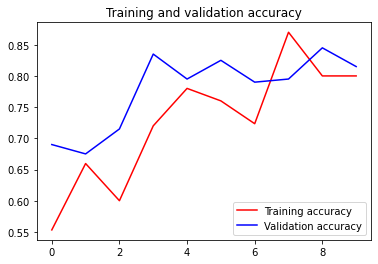

<Figure size 432x288 with 0 Axes>

In [25]:
acc = history_main.history['accuracy']
val_acc = history_main.history['val_accuracy']
loss = history_main.history['loss']
val_loss = history_main.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()


**wow, it has trained with good accuracy on validation data so, lets check with image**

In [32]:
# prediction
# preprocessing the input 

from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt

def prediction1(path1,history_main):

    path = path1
    img = image.load_img(path, target_size=(150,150,3))
    x = image.img_to_array(img)
    x = x/255.0

    x = np.expand_dims(x, axis=0)



    images = np.vstack([x])
    classes = history_main.predict(images, batch_size=10)


    n = cv2.imread(path)
    plt.imshow(n)
    
    return classes




[[1.000000e+00 1.549384e-17]]
it is a aliens with accuracy :  100 %


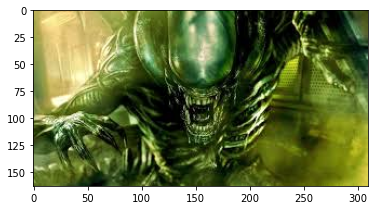

In [34]:
path1 = "../input/alien-vs-predator-images/data/validation/alien/2.jpg"
classes1 = prediction1(path1, history12)
print(classes1)
if classes1[0][0]>classes1[0][1]:
    print("it is a aliens with accuracy : ",str(classes1[0][0]*100)[:3],"%")
else:
    print("it is a predator with accuracy : ",str(classes1[0][1]*100)[:3],"%")

# **Great, it predicts everything correct note that**
> # **we can also increase the validation accuracy by** 
> # **try to change epochs. so last thing is (don't overfit it with training data)**

# **THANKS FOR CHECKING THIS PLEASE UPVOTE IT**

In [35]:
# THANKS for piotr migdal for image datasets
